In [1]:
import datetime as dt
from pathlib import Path
import os
import time
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'
train_path

PosixPath('/aiffel/aiffel/yoochoose/data/ratings.dat')

In [3]:
def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 3], dtype={0: np.int32, 1: np.int32}, nrows=nrows)
    data.columns = ['SessionId', 'ItemId', 'Time']
    return data

In [4]:
data = load_data(train_path, None)
#del(data['Rating'])
def ts(x):
    x=pd.to_datetime(time.strftime('%Y-%m-%d %I:%M:%S', time.gmtime(x)))
    return x
data['Time']=data['Time'].apply(ts)
data.sort_values(['Time'], inplace=True)
data

,SessionId,ItemId,Time
1000138,6040,858,2000-04-25 11:05:32
999873,6040,593,2000-04-25 11:05:54
1000153,6040,2384,2000-04-25 11:05:54
1000192,6040,2019,2000-04-25 11:06:17
1000007,6040,1961,2000-04-25 11:06:17
...,...,...,...
825438,4958,1407,2003-02-28 05:47:23
825731,4958,2634,2003-02-28 05:49:08
825724,4958,3264,2003-02-28 05:49:08
825603,4958,1924,2003-02-28 05:49:50


In [5]:
data2=data
data=data.reset_index()
del(data['index'])

In [6]:
count=1
st=data['Time'][0].date()
for i in range(len(data)):
    tmp=data['Time'][i].date()
    if st==tmp:
        data.SessionId[i]=count
    else:
        count+=1
        st=data['Time'][i].date()
        data.SessionId[i]=count
        
data.head(30)

,SessionId,ItemId,Time
0,1,858,2000-04-25 11:05:32
1,1,593,2000-04-25 11:05:54
2,1,2384,2000-04-25 11:05:54
3,1,2019,2000-04-25 11:06:17
4,1,1961,2000-04-25 11:06:17
5,1,3111,2000-04-25 11:07:36
6,1,1419,2000-04-25 11:07:36
7,1,3505,2000-04-25 11:07:36
8,1,213,2000-04-25 11:07:36
9,1,573,2000-04-25 11:07:36


In [7]:
data.sort_values(['SessionId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,SessionId,ItemId,Time
0,1,858,2000-04-25 11:05:32
1,1,593,2000-04-25 11:05:54
2,1,2384,2000-04-25 11:05:54
3,1,2019,2000-04-25 11:06:17
4,1,1961,2000-04-25 11:06:17
...,...,...,...
1000204,1040,1407,2003-02-28 05:47:23
1000205,1040,2634,2003-02-28 05:49:08
1000206,1040,3264,2003-02-28 05:49:08
1000207,1040,1924,2003-02-28 05:49:50


In [8]:
data['SessionId'].nunique(), data['ItemId'].nunique()

(1040, 3706)

In [9]:
session_length = data.groupby('SessionId').size()
session_length

SessionId
1        188
2       4432
3       1871
4       2292
5       1626
        ... 
1036      38
1037     182
1038      10
1039      49
1040      12
Length: 1040, dtype: int64

In [10]:
session_length.median(), session_length.mean()

(116.0, 961.7394230769231)

In [11]:
session_length.min(), session_length.max()

(1, 63654)

In [12]:
session_length.quantile(0.8)

1278.8000000000004

In [13]:
long_session = session_length[session_length==session_length.max()].index[0]
data[data['SessionId']==long_session]

,SessionId,ItemId,Time
595418,210,2549,2000-11-20 01:00:03
595419,210,172,2000-11-20 01:00:03
595420,210,611,2000-11-20 01:00:03
595421,210,258,2000-11-20 01:00:03
595422,210,1831,2000-11-20 01:00:03
...,...,...,...
659067,210,3219,2000-11-20 12:59:35
659068,210,3438,2000-11-20 12:59:39
659069,210,788,2000-11-20 12:59:39
659070,210,914,2000-11-20 12:59:42


In [14]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_8 = length_percent_cumsum[length_percent_cumsum < 0.8]

length_percent_cumsum_8

1       0.000962
2       0.001923
3       0.006731
4       0.009615
5       0.020192
          ...   
1206    0.795192
1229    0.796154
1238    0.797115
1258    0.798077
1260    0.799038
Length: 322, dtype: float64

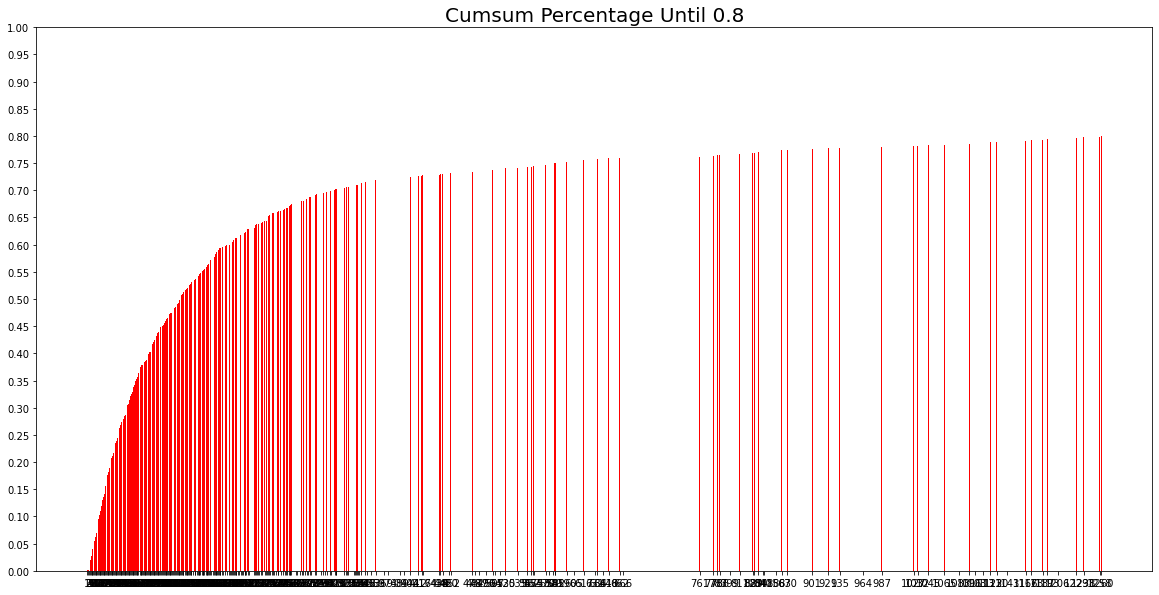

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_8.index,
        height=length_percent_cumsum_8, color='red')
plt.xticks(length_percent_cumsum_8.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.8', size=20)
plt.show()

In [16]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest) 
print(latest)

2000-04-25 11:05:32
2003-02-28 12:51:39


In [17]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
# month_ago = latest - dt.timedelta(30)     # 최종 날짜로부터 30일 이전 날짜를 구한다.  
# data = data[data['Time'] > month_ago]   # 방금 구한 날짜 이후의 데이터만 모은다. 
# data

In [19]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('SessionId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['SessionId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [20]:
data = cleanse_recursive(data, shortest=20, least_click=5)
data

,SessionId,ItemId,Time
0,1,858,2000-04-25 11:05:32
1,1,593,2000-04-25 11:05:54
2,1,2384,2000-04-25 11:05:54
3,1,2019,2000-04-25 11:06:17
4,1,1961,2000-04-25 11:06:17
...,...,...,...
1000192,1039,3555,2003-02-27 06:15:37
1000193,1039,1262,2003-02-27 06:17:38
1000194,1039,468,2003-02-27 10:00:12
1000195,1039,1036,2003-02-27 11:31:15


In [21]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index

    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [22]:
tr, test = split_by_date(data, n_days=250)
tr, val = split_by_date(tr, n_days=250)

In [23]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [24]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 964769
	 Sessions: 532
	 Items: 3416
	 First Time : 2000-04-25 11:05:32
	 Last Time : 2001-10-14 11:45:58

* valid Set Stats Info
	 Events: 20909
	 Sessions: 215
	 Items: 2866
	 First Time : 2001-10-15 02:31:55
	 Last Time : 2002-06-21 12:46:05

* test Set Stats Info
	 Events: 12489
	 Sessions: 163
	 Items: 2530
	 First Time : 2002-06-23 01:14:30
	 Last Time : 2003-02-27 12:31:39



In [25]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [26]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

In [27]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

In [28]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,SessionId,ItemId,Time,item_idx
0,1,858,2000-04-25 11:05:32,0
1,1,593,2000-04-25 11:05:54,1
2,1,2384,2000-04-25 11:05:54,2
3,1,2019,2000-04-25 11:06:17,3
4,1,1961,2000-04-25 11:06:17,4
5,1,3111,2000-04-25 11:07:36,5
6,1,1419,2000-04-25 11:07:36,6
7,1,3505,2000-04-25 11:07:36,7
8,1,213,2000-04-25 11:07:36,8
9,1,573,2000-04-25 11:07:36,9


In [29]:
tr_dataset.click_offsets

array([     0,    188,   4619,   6489,   8780,  10405,  11392,  13209,
        14588,  16648,  19061,  21386,  22215,  23654,  26460,  29726,
        31552,  33048,  37349,  38626,  40699,  42683,  44758,  47740,
        49726,  51808,  53315,  55112,  56444,  58983,  61011,  64138,
        66551,  68394,  70386,  72194,  75553,  78801,  82154,  85010,
        87623,  89353,  90778,  93036,  94179,  96427,  97557,  99985,
       101190, 102812, 105361, 106749, 109072, 111762, 112522, 113751,
       115036, 116814, 118388, 119852, 121018, 121570, 123886, 125382,
       126687, 127521, 128360, 133255, 137069, 141338, 154778, 160541,
       164584, 169230, 174984, 177388, 178710, 180475, 182717, 185104,
       186651, 188199, 190313, 191656, 193401, 195148, 198286, 199389,
       201985, 203016, 204521, 206245, 207427, 208008, 209832, 211361,
       212444, 216685, 223532, 233536, 244511, 265302, 274277, 286895,
       295567, 301464, 308407, 314060, 321013, 328433, 333600, 337229,
      

In [30]:
tr_dataset.session_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [31]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [32]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,SessionId,ItemId,Time,item_idx
0,1,858,2000-04-25 11:05:32,0
1,1,593,2000-04-25 11:05:54,1
2,1,2384,2000-04-25 11:05:54,2
3,1,2019,2000-04-25 11:06:17,3
4,1,1961,2000-04-25 11:06:17,4
5,1,3111,2000-04-25 11:07:36,5
6,1,1419,2000-04-25 11:07:36,6
7,1,3505,2000-04-25 11:07:36,7
8,1,213,2000-04-25 11:07:36,8
9,1,573,2000-04-25 11:07:36,9


In [33]:
iter_ex = iter(tr_data_loader)

In [34]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [  0 181 439 514]
Label Item Idx are :       [   1  182  456 1406]
Previous Masked Input Idx are []


In [35]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [37]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [38]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

In [39]:
args = Args(tr, val, test, batch_size=64, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model = create_model(args)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(64, 1, 3416)]           0         
_________________________________________________________________
GRU (GRU)                    [(64, 50), (64, 50)]      520200    
_________________________________________________________________
dropout (Dropout)            (64, 50)                  0         
_________________________________________________________________
dense (Dense)                (64, 3416)                174216    
Total params: 694,416
Trainable params: 694,416
Non-trainable params: 0
_________________________________________________________________


In [40]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 아래 메서드에서 확인해주세요.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져옵니다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져옵니다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 합니다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드입니다. 
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있습니다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax 값이 큰 순서대로 sorting 합니다.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [41]:
train_model(model, args)

Train:   0%|          | 0/15066 [00:00<?, ?it/s, accuracy=0.0469, train_loss=6.94]

	 - Recall@20 epoch 1: 0.121218
	 - MRR@20    epoch 1: 0.028346



Train:   0%|          | 0/15066 [00:00<?, ?it/s, accuracy=0.0156, train_loss=6.62]

	 - Recall@20 epoch 2: 0.154576
	 - MRR@20    epoch 2: 0.034448



Train:   0%|          | 0/15066 [00:00<?, ?it/s, accuracy=0.0156, train_loss=6.52]

	 - Recall@20 epoch 3: 0.163132
	 - MRR@20    epoch 3: 0.037549



Train:   0%|          | 0/15066 [00:00<?, ?it/s, accuracy=0, train_loss=6.42]     

	 - Recall@20 epoch 4: 0.163752
	 - MRR@20    epoch 4: 0.038369



Evaluation:  78%|███████▊  | 252/323 [01:39<00:28,  2.52it/s]

	 - Recall@20 epoch 5: 0.165117
	 - MRR@20    epoch 5: 0.039890



In [42]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  71%|███████   | 136/192 [00:56<00:23,  2.42it/s]

	 - Recall@20: 0.127413
	 - MRR@20: 0.030111



In [43]:
args2 = Args(tr, val, test, batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=1, k=20)
model2 = create_model(args2)
train_model(model2, args2)

Train:   0%|          | 0/7533 [00:00<?, ?it/s]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 1, 3416)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    520200    
_________________________________________________________________
dropout_1 (Dropout)          (128, 50)                 0         
_________________________________________________________________
dense_1 (Dense)              (128, 3416)               174216    
Total params: 694,416
Trainable params: 694,416
Non-trainable params: 0
_________________________________________________________________


Evaluation:  55%|█████▌    | 89/161 [01:10<00:56,  1.27it/s]

	 - Recall@20 epoch 1: 0.085938
	 - MRR@20    epoch 1: 0.017923



In [44]:
test_model(model2, args2, test)

Evaluation:  33%|███▎      | 32/96 [00:25<00:50,  1.27it/s]

	 - Recall@20: 0.064453
	 - MRR@20: 0.013782



In [45]:
args3 = Args(tr, val, test, batch_size=256, hsz=50, drop_rate=0.1, lr=0.001, epochs=1, k=20)
model3 = create_model(args3)
train_model(model3, args3)

Train:   0%|          | 0/3766 [00:00<?, ?it/s]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(256, 1, 3416)]          0         
_________________________________________________________________
GRU (GRU)                    [(256, 50), (256, 50)]    520200    
_________________________________________________________________
dropout_2 (Dropout)          (256, 50)                 0         
_________________________________________________________________
dense_2 (Dense)              (256, 3416)               174216    
Total params: 694,416
Trainable params: 694,416
Non-trainable params: 0
_________________________________________________________________


Evaluation:   0%|          | 0/80 [00:00<?, ?it/s]


IndexError: index 215 is out of bounds for axis 0 with size 215

In [ ]:
test_model(model3, args3, test)

In [46]:
args4 = Args(tr, val, test, batch_size=16, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model4 = create_model(args4)
train_model(model4, args4)

Train:   0%|          | 0/60264 [00:00<?, ?it/s]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(16, 1, 3416)]           0         
_________________________________________________________________
GRU (GRU)                    [(16, 50), (16, 50)]      520200    
_________________________________________________________________
dropout_3 (Dropout)          (16, 50)                  0         
_________________________________________________________________
dense_3 (Dense)              (16, 3416)                174216    
Total params: 694,416
Trainable params: 694,416
Non-trainable params: 0
_________________________________________________________________


Train:   0%|          | 0/60264 [00:00<?, ?it/s, accuracy=0, train_loss=6]        

	 - Recall@20 epoch 1: 0.144475
	 - MRR@20    epoch 1: 0.032758



Train:   0%|          | 0/60264 [00:00<?, ?it/s, accuracy=0.0625, train_loss=6.87]

	 - Recall@20 epoch 2: 0.157256
	 - MRR@20    epoch 2: 0.036969



Train:   0%|          | 0/60264 [00:00<?, ?it/s, accuracy=0, train_loss=6.94]

	 - Recall@20 epoch 3: 0.160930
	 - MRR@20    epoch 3: 0.038461



Train:   0%|          | 0/60264 [00:00<?, ?it/s, accuracy=0, train_loss=5.67]

	 - Recall@20 epoch 4: 0.160930
	 - MRR@20    epoch 4: 0.038211



Evaluation:  96%|█████████▌| 1242/1293 [02:37<00:06,  7.90it/s]

	 - Recall@20 epoch 5: 0.159420
	 - MRR@20    epoch 5: 0.038299



In [47]:
test_model(model4, args4, test)

Evaluation:  93%|█████████▎| 714/770 [01:31<00:07,  7.80it/s]

	 - Recall@20: 0.132616
	 - MRR@20: 0.032434



batch_size 값이 중요한 하이퍼 파라미터라는 것을 확인해 볼 수 있었다. 너무 크면 잘려서 활용하지 못하는 데이터가 많아지고, 범위를 벗어나 에러가 생길수도 있다. 너무 작으면 시간이 오래걸리게 되어 적절하게 맞춰주어야 한다.
학습을 통해 accuracy, Recall@20, MRR@20이 상승하고 loss가 줄어드는 것을 확인할 수 있었다. 하지만 수치가 너무 낮아 전처리와 모델 개선이 필요해 보인다.